<a href="https://colab.research.google.com/github/blackipod/hello-world/blob/main/INV6001_Assignment_2_4_Distributions_LIMFRANCES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code from https://github.com/amitkaps/hackermath/blob/master/Module_2d_Distributions.ipynb 

In [1]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [14]:
#always get raw version from github!!
url = 'https://raw.githubusercontent.com/blackipod/hello-world/main/cars_v1.csv'

In [16]:
#important, add encoding="ISO-8859-1"
cars = pd.read_csv(url, encoding="ISO-8859-1")

In [17]:
cars.Mileage.fillna(cars.Mileage.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


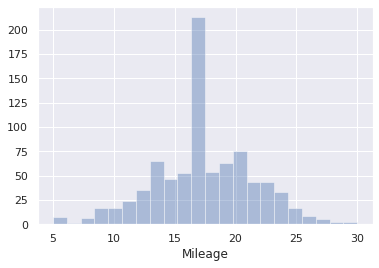

In [18]:
sns.distplot(cars.Mileage, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


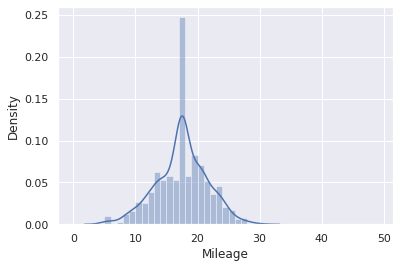

In [19]:
sns.distplot(cars.Mileage, bins=range(0,50,1))

In [25]:
from scipy import stats
import scipy as sp
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.randn is deprecated and will be removed in SciPy 2.0.0, use numpy.random.randn instead
  """Entry point for launching an IPython kernel.


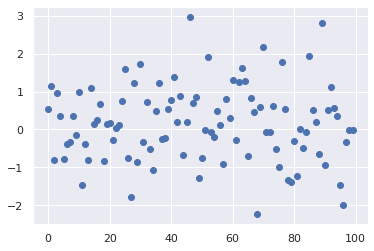

In [26]:
random_normal = sp.randn(100)
plt.scatter(range(100), random_normal)

In [41]:
print ("mean:", random_normal.mean(),"\n",  "variance:", random_normal.var())

n = stats.norm(loc=2.5, scale=1.7)

#.rvs is to generate random variable for scipy
print("New random number =", n.rvs())

#what is the pdf at 0.3 for the normal distribution?
print("PDF =", n.pdf(0.3))

#binomial distribution with p = 0.4, no. of trials = 15
stats.binom.pmf(range(15), 10, 0.4)

mean: 0.1645789197409952 
 variance: 0.9720483420018042
New random number = 2.329854764500409
PDF = 0.10157711386142985


array([6.04661760e-03, 4.03107840e-02, 1.20932352e-01, 2.14990848e-01,
       2.50822656e-01, 2.00658125e-01, 1.11476736e-01, 4.24673280e-02,
       1.06168320e-02, 1.57286400e-03, 1.04857600e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [38]:
?stats.binom

#Standard Error

In [39]:
cars.head()

,Make,Model,Price,Type,ABS,BootSpace,GearType,AirBag,Engine,FuelCapacity,Mileage
0,Ashok Leyland Stile,Ashok Leyland Stile LE 8-STR (Diesel),750,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
1,Ashok Leyland Stile,Ashok Leyland Stile LS 8-STR (Diesel),800,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
2,Ashok Leyland Stile,Ashok Leyland Stile LX 8-STR (Diesel),830,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
3,Ashok Leyland Stile,Ashok Leyland Stile LS 7-STR (Diesel),850,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
4,Ashok Leyland Stile,Ashok Leyland Stile LS 7-STR Alloy (Diesel),880,MPV,No,500.0,Manual,No,1461.0,50.0,20.7


In [40]:
print(" Sample Mean:", cars.Mileage.mean(),"\n", "Sample Standard Deviation", cars.Mileage.std())

 Sample Mean: 17.480407854984836 
 Sample Standard Deviation 4.086421315837099


In [42]:
print("Max Mileage:", cars.Mileage.max(), "\n", "Min Mileage:", cars.Mileage.min())

Max Mileage: 30.0 
 Min Mileage: 5.0


In [43]:
def squared_error(bootstrap_sample, actual_mean):
  return np.square(bootstrap_sample.mean() - actual_mean)

def experiment_for_computing_standard_error(observed_mileage, n_times, actual_mean):
  bootstrap_mean = np.empty([n_times,1], dtype=np.int32)
  bootstrap_sample = np.random.choice(observed_mileage, size=[observed_mileage.size, n_times], replace=True)
  bootstrap_squared_error = np.apply_along_axis(squared_error, 1, bootstrap_sample, actual_mean)

  return np.sqrt(bootstrap_squared_error.mean())


In [44]:
experiment_for_computing_standard_error(np.array(cars.Mileage), 10, 22.7)

5.411129140948524